In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [4]:
img = cv2.imread('lenna.bmp')

if img is None:
    print('Image load failed!')   

In [5]:
print(img.shape)

(512, 512, 3)


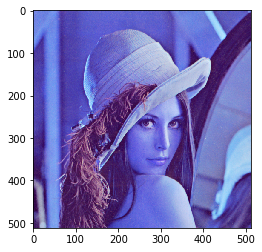

In [6]:
plt.imshow(img)  # opnecv BGR channel

In [7]:
B = img[:,:, 0]
G = img[:,:, 1]
R = img[:,:, 2]
print(B.shape)

(512, 512)


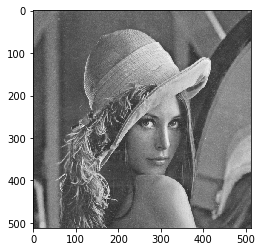

In [8]:
plt.imshow(B, cmap='gray')

## cv2.cvtColor

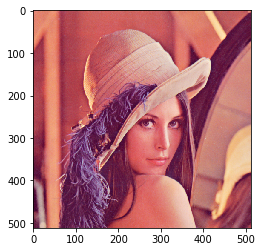

In [9]:
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB)

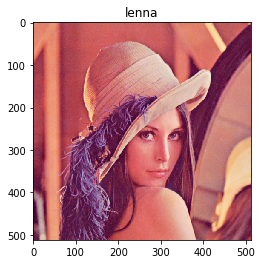

In [10]:
imshow("lenna", img)

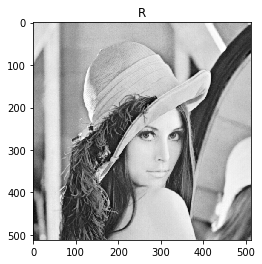

In [11]:
imshow("R", R)

In [12]:
print(img.shape)

(512, 512, 3)


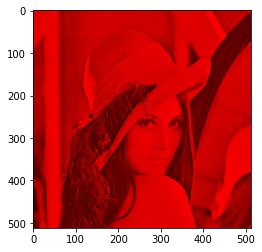

In [20]:
RR = np.zeros(img.shape)
RR[:,:, 0] = R / 255  # 0-255실수 
plt.imshow(RR)   #  int->0 ~ 255     실수 0 ~  1

In [28]:
img = cv2.imread('lenna.bmp')
R = img[:,:,2]
RR = np.zeros(img.shape)
RR[:,:, 2] = R /255.0 

cv2.imshow('src', img)
cv2.imshow('dest', RR)

cv2.waitKey()
cv2.destroyAllWindows()

## web

In [24]:
%%writefile image2.py

import cv2
import numpy as np

img = cv2.imread('lenna.bmp')
R = img[:,:,2]
RR = np.zeros(img.shape)
RR[:,:, 2] = R /255.0 

cv2.imshow('src', img)
cv2.imshow('dest', RR)

cv2.waitKey()
cv2.destroyAllWindows()

Writing image2.py


In [27]:
server = sp.Popen("python image2.py", shell=True)

In [26]:
%%writefile image2.py

import cv2
import numpy as np

img = cv2.imread('lenna.bmp')
B = img[:,:,0]
BB = np.zeros(img.shape)
BB[:,:, 0] = B /255.0 

cv2.imshow('src', img)
cv2.imshow('dest', BB)

cv2.waitKey()
cv2.destroyAllWindows()

Overwriting image2.py


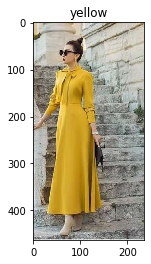

In [50]:
yellow = cv2.imread('yellow.jpg')
imshow("yellow", yellow )

In [51]:
hsv = cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)
print(hsv.shape)
h = hsv[:,:,0]
s = hsv[:,:,1]
print(h.shape)

(463, 236, 3)
(463, 236)


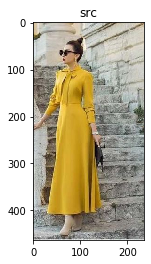

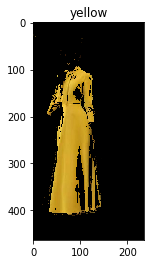

(463, 472, 3)


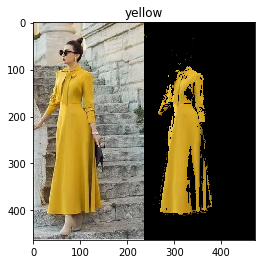

In [56]:
dest = yellow.copy()
for r in range(yellow.shape[0]) :
    for c in range(yellow.shape[1]) :
        if h[r,c] >= 10 and h[r,c] <= 50 and   s[r,c] >= 170 and s[r,c] <= 230 : 
            dest[r,c, :] =  yellow[r,c,:]  #[255,255,255]
        else :
            dest[r,c, :] = [0,0,0]         
imshow("src", yellow)
imshow("yellow", dest)

dest2 = np.hstack((yellow, dest ))
print(dest2.shape)
imshow("yellow", dest2)


99.9 122.10000000000001 199.8 244.20000000000002


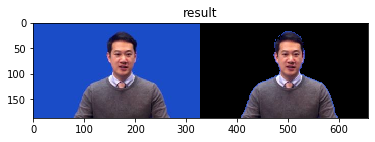

In [73]:
man = cv2.imread('man.jpg')
hsv = cv2.cvtColor(man, cv2.COLOR_BGR2HSV)
patch = hsv[0:20, 0:20, :]

minH = np.min(patch[:,:,0])*0.9
maxH = np.max(patch[:,:,0])*1.1

minS = np.min(patch[:,:,1])*0.9
maxS = np.max(patch[:,:,1])*1.1

h = hsv[:,:,0]
s = hsv[:,:,1]

print(minH, maxH, minS, maxS)

dest = man.copy()
for r in range(man.shape[0]) :
    for c in range(man.shape[1]) :
        if h[r,c] >= minH and h[r,c] <= maxH and   s[r,c] >= minS  and s[r,c] <= maxS : 
            dest[r,c, :] = [0,0,0]         
        else :
            dest[r,c, :] =  man[r,c,:]
            
dest = np.hstack((man, dest ))
imshow("result", dest)

In [17]:
def chromakey(img, background) :    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    patch = hsv[0:20, 0:20, :]
    minH = np.min(patch[:,:,0])*0.9
    maxH = np.max(patch[:,:,0])*1.1
    minS = np.min(patch[:,:,1])*0.9
    maxS = np.max(patch[:,:,1])*1.1
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    dest = img.copy()
    for r in range(img.shape[0]) :
        for c in range(img.shape[1]) :
            if h[r,c] >= minH and h[r,c] <= maxH and   s[r,c] >= minS  and s[r,c] <= maxS : 
                dest[r,c, :] = background[r,c,:]
            else :
                dest[r,c, :] =  img[r,c,:]
    return dest            

In [19]:
cap = cv2.VideoCapture('dance.mp4')
background = cv2.imread('background.jpg')
background = cv2.resize(background, dsize=(320,240)) 

for i in range(25*6) : 
        ret, frame = cap.read()
        frame = cv2.resize(frame, dsize=(320,240)) 
                        
        dest = chromakey(frame,background)
        
        dest = np.hstack((frame, dest))
        cv2.imshow('frame', dest)        
        
        if cv2.waitKey(10) == 27:
            break

cv2.destroyAllWindows()

In [15]:
%%writefile server.py

from flask import Flask, request
app = Flask(__name__)

@app.route('/') 
def index():
    return "안녕하세요^^"
    
@app.route('/upload')
def upload():
    return "upload~~~~~"
    
if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

Overwriting server.py


In [13]:
server = sp.Popen("python server.py", shell=True)

In [36]:
%%writefile server.py

import cv2
import numpy as np
from flask import Flask, request
import datetime

app = Flask(__name__)

def chromakey(img, background) :    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    patch = hsv[0:20, 0:20, :]
    minH = np.min(patch[:,:,0])*0.9
    maxH = np.max(patch[:,:,0])*1.1
    minS = np.min(patch[:,:,1])*0.9
    maxS = np.max(patch[:,:,1])*1.1
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    dest = img.copy()
    for r in range(img.shape[0]) :
        for c in range(img.shape[1]) :
            if h[r,c] >= minH and h[r,c] <= maxH and   s[r,c] >= minS  and s[r,c] <= maxS : 
                dest[r,c, :] = background[r,c,:]
            else :
                dest[r,c, :] =  img[r,c,:]
    return dest            

@app.route('/') 
def index():
    html = """    
       <form action=/upload method=post enctype="multipart/form-data">
          <input type=file name=file1> <input type=submit value="전송">     
        <select name=backimg> 
            <option value=background.jpg>바다</option>
            <option value=background2.jpg>풍경2</option>
            <option value=background3.jpg>풍경3</option>
        </select>
        
        <img src=/static/background.jpg width=100>
        <img src=/static/background2.jpg width=100>
        <img src=/static/background3.jpg width=100>        
        
       </form>
    """    
    return html
    
@app.route('/upload', methods=["post"])
def upload():
    f = request.files['file1']   
    filename = "./static/" + f.filename
    f.save(filename)   
    
    backimg = request.form.get("backimg")
    
     
    img = cv2.imread(filename)
    img = cv2.resize(img, dsize=(320,240))     
    
    background = cv2.imread("./static/" + backimg)
    background = cv2.resize(background, dsize=(320,240)) 

    img = chromakey(img, background)    
    cv2.imwrite(filename, img)    
    
    return "<img src=/static/"  + f.filename + "?" + datetime.datetime.now().strftime('%H%M%S') + ">"
    
if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

Overwriting server.py


In [2]:
%%writefile server.py

from flask import Flask, request
import datetime

app = Flask(__name__)

@app.route('/')
def index():
    html = """

<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1">


<form  action="/upload" method="post" enctype="multipart/form-data">
    <input type="file" name="file1" accept="images/*" capture="camera">
    <input type="submit" value="전송">
</form>        
    
    """
    return html

@app.route('/upload',methods = ['POST'])
def upload():
    f = request.files['file1']   
    filename = "./static/" + f.filename
    f.save(filename)    
    
    img = cv2.imread(filename)
    img = cv2.resize(img, dsize=(320,240)) 
    
    
    cv2.imwrite(filename, img)
    
    
    return "<img src=/static/" + f.filename + "?>"

if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

Overwriting server.py


In [4]:
server = sp.Popen("python server.py", shell=True)